### Name: Harleen Kaur Taunque
#### Student Id : 20811951
### Name: Somesh Kumar Gupta
#### Student Id : 20817245


# Q2. Feature Extraction for Dataset B

In [1]:
# Python packages to import 
import sys 
import numpy as np 
import pandas as pd 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import LocallyLinearEmbedding
from matplotlib import offsetbox
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA



In [2]:
# Display all the Columns in the dataset for better analysis
pd.set_option('display.max_columns',None)

In [3]:
# import DataB.csv 
dataB = pd.read_csv('~/Documents/Uwaterloo_Study_Docs/657A_ECE/Assignments/ece_657a_assignments/Assignment_1/Datasets/DataB.csv')

In [4]:
print("DataB: \n", dataB.head(1))

DataB: 
   Unnamed: 0  fea.1  fea.2  fea.3  fea.4  fea.5  fea.6  fea.7  fea.8  fea.9  \
0           1      4      4      3      0      0      4      2      1      4   

   fea.10  fea.11  fea.12  fea.13  fea.14  fea.15  fea.16  fea.17  fea.18  \
0       1       0       4       1       4       0       3       1       4   

   fea.19  fea.20  fea.21  fea.22  fea.23  fea.24  fea.25  fea.26  fea.27  \
0       4       3       4       4       3       1       2       1       1   

   fea.28  fea.29  fea.30  fea.31  fea.32  fea.33  fea.34  fea.35  fea.36  \
0       3       4       1       3       2       0       2       0       2   

   fea.37  fea.38  fea.39  fea.40  fea.41  fea.42  fea.43  fea.44  fea.45  \
0       3       3       4       3       4       4       5       4       5   

   fea.46  fea.47  fea.48  fea.49  fea.50  fea.51  fea.52  fea.53  fea.54  \
0       1       4       3       1       3       0       4       5       4   

   fea.55  fea.56  fea.57  fea.58  fea.59  fea.60  fea.6

#### As we can see from the above data is that there is a Unnamed column in the dataset that need to be removed. The dimension of the Dataset is (2066, 786)    

In [5]:
dataB_updated = dataB.drop(['Unnamed: 0'], axis=1)
print("DataB: \n", dataB_updated.head(1))

DataB: 
   fea.1  fea.2  fea.3  fea.4  fea.5  fea.6  fea.7  fea.8  fea.9  fea.10  \
0      4      4      3      0      0      4      2      1      4       1   

   fea.11  fea.12  fea.13  fea.14  fea.15  fea.16  fea.17  fea.18  fea.19  \
0       0       4       1       4       0       3       1       4       4   

   fea.20  fea.21  fea.22  fea.23  fea.24  fea.25  fea.26  fea.27  fea.28  \
0       3       4       4       3       1       2       1       1       3   

   fea.29  fea.30  fea.31  fea.32  fea.33  fea.34  fea.35  fea.36  fea.37  \
0       4       1       3       2       0       2       0       2       3   

   fea.38  fea.39  fea.40  fea.41  fea.42  fea.43  fea.44  fea.45  fea.46  \
0       3       4       3       4       4       5       4       5       1   

   fea.47  fea.48  fea.49  fea.50  fea.51  fea.52  fea.53  fea.54  fea.55  \
0       4       3       1       3       0       4       5       4       4   

   fea.56  fea.57  fea.58  fea.59  fea.60  fea.61  fea.62  fea.6

#### After removing the 'Unnamed' Column the dimension becomes (2066, 785) as evident from above 

# Missing Value Check in the Dataset

In [6]:
# Check for Missing Values 
print("Number of Missing Values in Each column of Dataset: \n",dataB_updated.isna().sum())

Number of Missing Values in Each column of Dataset: 
 fea.1      0
fea.2      0
fea.3      0
fea.4      0
fea.5      0
          ..
fea.781    0
fea.782    0
fea.783    0
fea.784    0
gnd        0
Length: 785, dtype: int64


In [7]:
# Total Number of Missing Values 
print("Total Number of Missing Values in the Dataset: ",dataB_updated.isna().sum().sum())

Total Number of Missing Values in the Dataset:  0


#### As we can see from the above value that there are no missing values in the complete dataset

In [8]:
# Number of class labels in the gnd column
print("Number of Unique class in the Dataset: ",dataB_updated['gnd'].unique())

Number of Unique class in the Dataset:  [0 1 2 3 4]


#### Here we can see that there are 5 different class labels in the 'gnd' column

In [9]:
dataB_X = dataB_updated.drop(['gnd'], axis=1)
dataB_y = dataB_updated['gnd']
print("Features: \n",dataB_X.head(5))
print("Targets: \n", dataB_y.head(5))

       0   
2        3      222      254      255      187        1        2        1   
3        5       37      254      251      213       49        5        2   
4        4        4        5      163      255      255      117        2   

   fea.445  fea.446  fea.447  fea.448  fea.449  fea.450  fea.451  fea.452  \
0        2        1        4        0        4        5        4        3   
1        5        1        1        2        2        5        4        2   
2        2        2        0        1        2        2        2        4   
3        5        2        2        2        1        2        2        3   
4        2        1        2        3        4        1        2        1   

   fea.453  fea.454  fea.455  fea.456  fea.457  fea.458  fea.459  fea.460  \
0        3        5       85      255      230       25        1        4   
1        4      191      253      252      252        3        2        1   
2        2        5        2        1       66      221      2

#### Seperating the data based on the features and the target('gnd') column where all the features are taken into 'dataB_X' variable where all the target values are taken in 'dataB_y' variable

## Q2.1 EigenVectors and EigenValues Calculation of the Dataset  
#### In order to caluculate the EigenValues and EigenVectors of the dataset first step is construct the Covariance Matrix.

#### Step:1. Standardisation of the Dataset

In [10]:
standarscaler = StandardScaler()
standarscaler.fit(dataB_X)
dataB_X_std = standarscaler.transform(dataB_X)
dataB_y_values = dataB_y.values
print("dataB_X_std: \n", dataB_X_std)

dataB_X_std: 
 [[ 1.01007711  0.96678184  0.35959365 ... -1.03428476  1.04733254
   1.64964331]
 [ 1.68717617 -1.02992387  1.02648816 ...  0.30710401  1.70203421
   0.98463588]
 [-1.02122007  0.30121327 -1.64108987 ... -1.03428476 -0.2620708
   0.98463588]
 ...
 [-0.34412101  0.30121327 -0.30730086 ... -1.03428476 -0.91677248
   0.31962845]
 [ 1.68717617 -0.3643553   1.02648816 ...  0.9777984   0.39263087
   0.98463588]
 [ 0.33297805  0.30121327 -0.97419536 ... -1.03428476  0.39263087
  -1.01038641]]


#### The Complete dataB here is standardised in order to calculate the EigenValues and EigenVectors of the Dataset

### Step.2: Covariance Matrix Calculation for the Dataset

In [11]:
dataB_CovMat = np.cov(dataB_X_std.T)
EigenValues, EigenVectors = np.linalg.eigh(dataB_CovMat)



In [12]:
print("\n EigenValues.shape: ", EigenValues.shape)
print("\n EigenValues: \n", EigenValues)



 EigenValues.shape:  (784,)

 EigenValues: 
 [7.10466561e-03 7.43794649e-03 7.71149989e-03 8.14488845e-03
 8.34035124e-03 8.54048562e-03 8.82056525e-03 8.93192486e-03
 9.09831448e-03 9.31307758e-03 9.58849106e-03 9.69892410e-03
 1.00322024e-02 1.00736363e-02 1.01457638e-02 1.06412158e-02
 1.08129008e-02 1.09433143e-02 1.11619155e-02 1.12373849e-02
 1.13628067e-02 1.15190236e-02 1.16052660e-02 1.18335915e-02
 1.20787835e-02 1.22316057e-02 1.24225729e-02 1.26167660e-02
 1.27207821e-02 1.28369117e-02 1.29080794e-02 1.30555115e-02
 1.33046542e-02 1.34022076e-02 1.35174614e-02 1.36723998e-02
 1.39527048e-02 1.41431281e-02 1.42711101e-02 1.44948392e-02
 1.45343097e-02 1.47397414e-02 1.48912318e-02 1.50939880e-02
 1.53408727e-02 1.54806987e-02 1.56594762e-02 1.57584247e-02
 1.59376580e-02 1.60528103e-02 1.63249513e-02 1.63564608e-02
 1.66122410e-02 1.67151921e-02 1.67939333e-02 1.71649898e-02
 1.72645039e-02 1.73777548e-02 1.76953947e-02 1.78165760e-02
 1.79045769e-02 1.79698710e-02 1.833722

#### As we can see that the dimension of EigenValues of the Dataset B is (784,1) in addition to all the EigenValues of the Dataset.

In [13]:
print("\n EigenVectors.shape: ", EigenVectors.shape)
print("\n EigenVectors: \n", EigenVectors)


 EigenVectors.shape:  (784, 784)

 EigenVectors: 
 [[ 0.00178531 -0.00069225  0.00294198 ... -0.00037529  0.00493308
   0.00197863]
 [ 0.00479506  0.0040447   0.00188671 ...  0.00258725 -0.00640373
   0.00151307]
 [-0.00816424  0.00090736  0.00838343 ... -0.00372451 -0.00156563
  -0.00049178]
 ...
 [-0.00498406 -0.00319481  0.00055758 ... -0.00335936  0.00300533
  -0.0001125 ]
 [-0.00351318 -0.00012294  0.00186681 ...  0.00553066  0.00947149
  -0.00132315]
 [ 0.00323845 -0.00054035  0.0001313  ...  0.00624184  0.00287621
   0.00591181]]


#### The dimension of the EigneVectors is (784, 784) and the list of all the EigenVectors of the Dataset is shown. 

#### Note: The EigenValues define the magnitude of the EigenVectors in terms of its variance.  

In [14]:
# Calculate the pairwise from top EigenVales and EigenVectors of the Dataset in order to find the variances in the higher dimensional space 
EigenPairs = [(np.abs(EigenValues[index]), EigenVectors[:, index]) for index in range(len(EigenValues))]
EigenPairs.sort(key = lambda k: k[0], reverse=True)


### Step.2 Projection Matrix Calculation with Principle Components(PC)-1 and Principle Component(PC)-2

In [15]:
# Projection Matrix is
ProMatrix = np.hstack((EigenPairs[0][1][:, np.newaxis], EigenPairs[1][1][:, np.newaxis]))
print(" Projection Matrix: \n", ProMatrix)

Projection Matrix: 
 [[ 0.00197863  0.00493308]
 [ 0.00151307 -0.00640373]
 [-0.00049178 -0.00156563]
 ...
 [-0.0001125   0.00300533]
 [-0.00132315  0.00947149]
 [ 0.00591181  0.00287621]]


#### The Projection matrix consists of PC-1 and PC-2 which has the higest variance in the dataset.

### Step.3 Transformation of Dataset using Projection Matrix on to the PC-1 and PC-2

In [16]:
dataB_X_std_pro = dataB_X_std.dot(ProMatrix)
print("\n Dimension of the Projected DatasetB: ", dataB_X_std_pro.shape)
print("\n Projection of DatasetB using PC-1 and PC-2 Projetion Matrix: \n",dataB_X_std_pro)


 Dimension of the Projected DatasetB:  (2066, 2)

 Projection of DatasetB using PC-1 and PC-2 Projetion Matrix: 
 [[ 9.97069222  6.18172201]
 [11.41599978  6.94158705]
 [ 3.69011918  4.69309729]
 ...
 [-0.34942153  0.93368106]
 [-3.11526327  2.09047425]
 [-5.64409375 -0.24616663]]


#### The DatasetB is projected using the PC-1 and PC-2 as shown above

### Name: Harleen Kaur Taunque
#### Student Id : 20811951
### Name: Somesh Kumar Gupta
#### Student Id : 20817245


# Q2.2 Plot of the Dataset B using the Projection Matrix which consists of PC-1 and PC-2

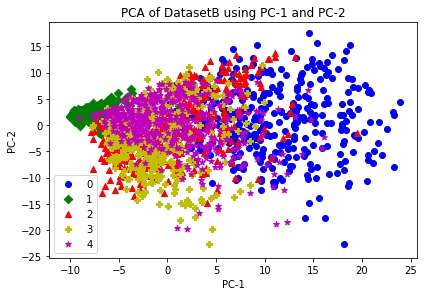

In [17]:
colors = ['b', 'g', 'r', 'y', 'm']
markers = ['o', 'D', '^', 'P', '*']

for index, color, marker in zip(np.unique(dataB_y), colors, markers):
    plt.scatter(dataB_X_std_pro[dataB_y_values == index, 0], dataB_X_std_pro[dataB_y_values ==index, 1], c=color, label= index, marker= marker)

plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.legend(loc='best')
plt.tight_layout()
plt.title("PCA of DatasetB using PC-1 and PC-2")
plt.show()



#### PCA is performed on the DatasetB using the PC-1 and PC-2. In the above graph each class label as shown in the graph is plotted with a different color. It is evident form the above graph that the DatasetB can not be seperated Linearly. 

### Name: Harleen Kaur Taunque
#### Student Id : 20811951
### Name: Somesh Kumar Gupta
#### Student Id : 20817245


# Q2.3 Projection of the DatasetB using PC-5 and PC-6 Projection Matrix


In [18]:
# Projection Matrix is
ProMatrix_PC56 = np.hstack((EigenPairs[4][1][:, np.newaxis], EigenPairs[5][1][:, np.newaxis]))
print(" Projection Matrix: \n", ProMatrix_PC56)

Projection Matrix: 
 [[-0.0032507   0.00096031]
 [ 0.00376721 -0.0065041 ]
 [ 0.00138427  0.00086984]
 ...
 [ 0.00138768  0.01078037]
 [-0.00260272 -0.00577003]
 [-0.00052576 -0.00856238]]


#### Transformation of Dataset using Projection Matrix consisting of PC-5 and PC-6

In [19]:
dataB_X_std_pro_PC56 = dataB_X_std.dot(ProMatrix_PC56)
print("\n Dimension of the Projected DatasetB: ", dataB_X_std_pro_PC56.shape)
print("\n Projection of DatasetB using PC-5 and PC-6 Projetion Matrix: \n",dataB_X_std_pro_PC56)


 Dimension of the Projected DatasetB:  (2066, 2)

 Projection of DatasetB using PC-5 and PC-6 Projetion Matrix: 
 [[-2.77786998  2.84476143]
 [-1.84494034  0.14643064]
 [-6.81180551  3.22610667]
 ...
 [-2.81443825  2.82286727]
 [-0.03630758  2.5864369 ]
 [-2.47709658  3.19848918]]


#### Here the datasetB in the original dimension has been projected using the PC-5 and PC-6 as shown above

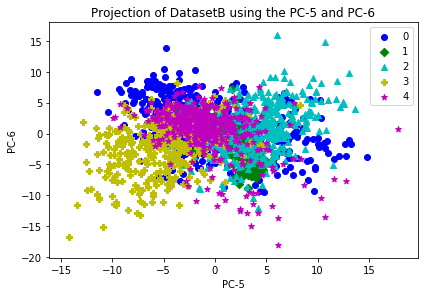

In [20]:
colors = ['b', 'g', 'c', 'y', 'm']
markers = ['o', 'D', '^', 'P', '*']

for index, color, marker in zip(np.unique(dataB_y), colors, markers):
    plt.scatter(dataB_X_std_pro_PC56[dataB_y_values == index, 0], dataB_X_std_pro_PC56[dataB_y_values ==index, 1], c=color, label= index, marker= marker)

plt.xlabel('PC-5')
plt.ylabel('PC-6')
plt.legend(loc='best')
plt.tight_layout()
plt.title("Projection of DatasetB using the PC-5 and PC-6")
plt.show()


### Analysis and Comparision between PC-1, PC-2 and PC-5, PC-6 plot: 
#### In the plot of PC-1 vs PC-2, the x-limit and the y-limit for PC-1 and PC-2 respectively stretches from -10 to 25 and from the plot it is clear that the dataset in this cannot be seperated Linearly. In addition, most of the data is projected on to the range of -10 to 5 on the x-axis(along PC-1) and -10 to 10 on the y-axis(along PC-2). The majority of the label '0' data is projected further apart form the other labels with variance in the label higher than other labels. The Labels '1', '2', '3' and '4' overlaps one another in the 2D plot with variance for label '1' being quite low, it is the lowest among other labels. Majority of the data from label '2', '3' and '4' are projected on to one another which make it difficult to identify visually.
#### From the plot of PC-5, PC-6 the majority data is projected between -10 to 10 along the x-axis(PC-5) and -10 to 10 along the y-axis(PC-6). It is more centered towards 0 which different from that of the plot by PC-1 and PC-2. In addition the variance in label '0' is still higher than other labels. The label '1' is not visually clear in the 2D space as the other labels are projected along with it. Here again, the data can not be seperated linearly. 

### Name: Harleen Kaur Taunque
#### Student Id : 20811951
### Name: Somesh Kumar Gupta
#### Student Id : 20817245


# Q2.4 Naive Bayes Classifier

### 1. Naive Bayes on first 2 Components (PC-1 and PC-2) 

In [21]:
# Split the Datset in order to use the Naive Bayes Classifier
X_train_q2, X_test_q2, y_train_q2, y_test_q2 = train_test_split(dataB_X, dataB_y, test_size=0.4, random_state=42)

ss = StandardScaler()

ss.fit(X_train_q2)
X_train_std_q2 = ss.transform(X_train_q2)

ss.fit(X_test_q2)
X_test_std_q2 = ss.transform(X_test_q2)

y_train_values_q2 = y_train_q2.values 
y_test_values_q2 = y_test_q2.values

In [22]:
pca_q2_2PC = PCA(n_components=2)
X_train_std_q2_pca_2PC = pca_q2_2PC.fit_transform(dataB_X_std)
X_test_std_q2_pca_2PC = pca_q2_2PC.fit_transform(X_test_std_q2)
gnb_q2_2PC = GaussianNB()
gnb_q2_2PC.fit(X_train_std_q2_pca_2PC, dataB_y_values)
y_pred_q2_2PC = gnb_q2_2PC.predict(X_train_std_q2_pca_2PC)
accuracy_2PC = accuracy_score(dataB_y_values, y_pred_q2_2PC)
print("\n Accuracy Score for Test Set using 2PCs: {0:.3f}%".format( accuracy_2PC*100))



 Accuracy Score for Test Set using 2PCs: 58.422%


#### The Accuracy Score for the Complete dataset with 60% after using 2 PCs of the Data is 58.422%.

In [23]:
# Number of Errors is given as 
print("Number of Mislabelled points out of total %d points: %d"%(X_train_std_q2_pca_2PC.shape[0], (dataB_y_values != y_pred_q2_2PC).sum()))

Number of Mislabelled points out of total 2066 points: 859


In [24]:
# Explained Variace ratio 
print("\n Explained Variance for 2PCs: ",pca_q2_2PC.explained_variance_ratio_.cumsum())


 Explained Variance for 2PCs:  [0.06666315 0.10288598]


In [25]:
# classification error and retained variance list for all the sets
global classification_error 
classification_error = []
global retained_variance
retained_variance = []
classification_error_2PC = (1 - accuracy_2PC)
retained_variance_2PC = pca_q2_2PC.explained_variance_ratio_.cumsum()
classification_error.append(classification_error_2PC)
retained_variance.append(retained_variance_2PC[-1])
print("Classification Error in 2PC: ",classification_error)
print("Retained Variance for 2PC: ",retained_variance)

Classification Error in 2PC:  [0.4157792836398838]
Retained Variance for 2PC:  [0.10288598165844996]


## Naive Bayes on first 4 Components 

In [26]:
pca_q2_4PC = PCA(n_components=4)
X_train_std_q2_pca_4PC = pca_q2_4PC.fit_transform(dataB_X_std)
X_test_std_q2_pca_4PC = pca_q2_4PC.fit_transform(X_test_std_q2)
gnb_q2_4PC = GaussianNB()
gnb_q2_4PC.fit(X_train_std_q2_pca_4PC, dataB_y_values)
y_pred_q2_4PC = gnb_q2_4PC.predict(X_train_std_q2_pca_4PC)
accuracy_4PC = accuracy_score(dataB_y_values, y_pred_q2_4PC)
print("\n Accuracy Score for Test Set using 4PCs: {0:.3f}%".format( accuracy_4PC*100))


 Accuracy Score for Test Set using 4PCs: 79.526%


In [27]:
# Classification Error is given as 
print("Number of Mislabelled points out of total %d points: %d"%(X_train_std_q2_pca_4PC.shape[0], (dataB_y_values != y_pred_q2_4PC).sum()))

Number of Mislabelled points out of total 2066 points: 423


In [28]:
# Explained Variace ratio 
print("\n Explained Variance for 4PCs: \n",pca_q2_4PC.explained_variance_ratio_.cumsum())


 Explained Variance for 4PCs: 
 [0.06666315 0.10288598 0.13772673 0.1695333 ]


In [29]:
# classification error and retained variance list for all the sets
classification_error_4PC = (1 - accuracy_4PC)
retained_variance_4PC = pca_q2_4PC.explained_variance_ratio_.cumsum()
classification_error.append(classification_error_4PC)
retained_variance.append(retained_variance_4PC[-1])
print("Classification Error for 4PC: ",classification_error[-1])
print("Retained Variance for 4PC: ",retained_variance[-1])

Classification Error for 4PC:  0.20474346563407553
Retained Variance for 4PC:  0.1695332979070685


## Naive Bayes Classification on First 10 PC

In [30]:
pca_q2_10PC = PCA(n_components=10)
X_train_std_q2_pca_10PC = pca_q2_10PC.fit_transform(dataB_X_std)
X_test_std_q2_pca_10PC = pca_q2_10PC.fit_transform(X_test_std_q2)
gnb_q2_10PC = GaussianNB()
gnb_q2_10PC.fit(X_train_std_q2_pca_10PC, dataB_y_values)
y_pred_q2_10PC = gnb_q2_10PC.predict(X_train_std_q2_pca_10PC)
accuracy_10PC = accuracy_score(dataB_y_values, y_pred_q2_10PC)
print("\n Accuracy Score for Test Set using 10PCs: {0:.3f}%".format( accuracy_10PC*100))


 Accuracy Score for Test Set using 10PCs: 90.465%


In [31]:
print("Number of Mislabelled points out of total %d points: %d"%(X_train_std_q2_pca_10PC.shape[0], (dataB_y_values != y_pred_q2_10PC).sum()))

Number of Mislabelled points out of total 2066 points: 197


In [32]:
# Explained Variace ratio 
print("\n Explained Variance for 10PCs: \n",pca_q2_10PC.explained_variance_ratio_.cumsum())


 Explained Variance for 10PCs: 
 [0.06666315 0.10288598 0.13772673 0.1695333  0.19761394 0.22010354
 0.23845784 0.25427209 0.26875167 0.28214151]


In [33]:
# classification error and retained variance list for all the sets
classification_error_10PC = (1 - accuracy_10PC)
retained_variance_10PC = pca_q2_10PC.explained_variance_ratio_.cumsum()
classification_error.append(classification_error_10PC)
retained_variance.append(retained_variance_10PC[-1])
print("Classification Error for 10PC: ",classification_error[-1])
print("Retained Variance for 10PC: ",retained_variance[-1])

Classification Error for 10PC:  0.09535333978702809
Retained Variance for 10PC:  0.28214151492617706


## Naive Bayes Classification on First 30 PC

In [34]:
pca_q2_30PC = PCA(n_components=30)
X_train_std_q2_pca_30PC = pca_q2_30PC.fit_transform(dataB_X_std)
X_test_std_q2_pca_30PC = pca_q2_30PC.fit_transform(X_test_std_q2)
gnb_q2_30PC = GaussianNB()
gnb_q2_30PC.fit(X_train_std_q2_pca_30PC, dataB_y_values)
y_pred_q2_30PC = gnb_q2_30PC.predict(X_train_std_q2_pca_30PC)
accuracy_30PC = accuracy_score(dataB_y_values, y_pred_q2_30PC)
print("\n Accuracy Score for Test Set using 30PCs: {0:.3f}%".format( accuracy_30PC*100))


 Accuracy Score for Test Set using 30PCs: 90.900%


In [35]:
print("Number of Mislabelled points out of total %d points: %d"%(X_train_std_q2_pca_30PC.shape[0], (dataB_y_values != y_pred_q2_30PC).sum()))

Number of Mislabelled points out of total 2066 points: 188


In [36]:
# Explained Variace ratio 
print("\n Explained Variance for 30PCs: \n",pca_q2_30PC.explained_variance_ratio_.cumsum())


 Explained Variance for 30PCs: 
 [0.06666315 0.10288598 0.13772673 0.1695333  0.19761394 0.22010355
 0.2384579  0.25427235 0.26875234 0.28215207 0.29461618 0.30639336
 0.31760765 0.32793408 0.3381926  0.34775451 0.35679998 0.36571905
 0.37419293 0.38216999 0.38978916 0.39719829 0.40437084 0.4113821
 0.41802796 0.42462649 0.43110156 0.4374427  0.44347907 0.44943014]


In [37]:
# classification error and retained variance list for all the sets
classification_error_30PC = (1 - accuracy_30PC)
retained_variance_30PC = pca_q2_30PC.explained_variance_ratio_.cumsum()
classification_error.append(classification_error_30PC)
retained_variance.append(retained_variance_30PC[-1])
print("Classification Error for 30PC: ",classification_error[-1])
print("Retained Variance for 30PC: ",retained_variance[-1])

Classification Error for 30PC:  0.09099709583736693
Retained Variance for 30PC:  0.44943014415938365


## Naive Bayes Classification on First 60 PC

In [38]:
pca_q2_60PC = PCA(n_components=60)
X_train_std_q2_pca_60PC = pca_q2_60PC.fit_transform(dataB_X_std)
X_test_std_q2_pca_60PC = pca_q2_60PC.fit_transform(X_test_std_q2)
gnb_q2_60PC = GaussianNB()
gnb_q2_60PC.fit(X_train_std_q2_pca_60PC, dataB_y_values)
y_pred_q2_60PC = gnb_q2_60PC.predict(X_train_std_q2_pca_60PC)
accuracy_60PC = accuracy_score(dataB_y_values, y_pred_q2_60PC)
print("\n Accuracy Score for Test Set using 60PCs: {0:.3f}%".format( accuracy_60PC*100))


 Accuracy Score for Test Set using 60PCs: 79.768%


In [39]:
print("Number of Mislabelled points out of total %d points: %d"%(X_train_std_q2_pca_60PC.shape[0], (dataB_y_values != y_pred_q2_60PC).sum()))

Number of Mislabelled points out of total 2066 points: 418


In [40]:
# Explained Variace ratio 
print("\n Explained Variance for 60PCs: \n",pca_q2_60PC.explained_variance_ratio_.cumsum())


 Explained Variance for 60PCs: 
 [0.06666315 0.10288598 0.13772673 0.1695333  0.19761394 0.22010355
 0.2384579  0.25427235 0.26875234 0.28215208 0.29461619 0.30639337
 0.31760769 0.32793428 0.33819283 0.34775482 0.35680059 0.36572013
 0.37419452 0.38217266 0.38979461 0.39720552 0.40438675 0.41140726
 0.41806392 0.42467591 0.43116109 0.43753195 0.4435879  0.44956275
 0.45541056 0.46112333 0.46663944 0.47204958 0.47741534 0.48244481
 0.48745212 0.49240457 0.49720088 0.50196341 0.50660409 0.5111877
 0.5156683  0.52008584 0.52446002 0.52869494 0.53284575 0.53694327
 0.54101384 0.54497    0.54890321 0.55281316 0.55666759 0.56038042
 0.56403857 0.56764293 0.57115458 0.5746013  0.5779978  0.58136336]


In [41]:
# classification error and retained variance list for all the sets
classification_error_60PC = (1 - accuracy_60PC)
retained_variance_60PC = pca_q2_60PC.explained_variance_ratio_.cumsum()
classification_error.append(classification_error_60PC)
retained_variance.append(retained_variance_60PC[-1])
print("Classification Error for 60PC: ",classification_error[-1])
print("Retained Variance for 60PC: ",retained_variance[-1])

Classification Error for 60PC:  0.20232333010648595
Retained Variance for 60PC:  0.5813633577754795


## Naive Bayes Classification on First 200 PC

In [42]:
pca_q2_200PC = PCA(n_components=200)
X_train_std_q2_pca_200PC = pca_q2_200PC.fit_transform(dataB_X_std)
X_test_std_q2_pca_200PC = pca_q2_200PC.fit_transform(X_test_std_q2)
gnb_q2_200PC = GaussianNB()
gnb_q2_200PC.fit(X_train_std_q2_pca_200PC, dataB_y_values)
y_pred_q2_200PC = gnb_q2_200PC.predict(X_train_std_q2_pca_200PC)
accuracy_200PC = accuracy_score(dataB_y_values, y_pred_q2_200PC)
print("\n Accuracy Score for Test Set using 200PCs: {0:.3f}%".format( accuracy_200PC*100))


 Accuracy Score for Test Set using 200PCs: 76.379%


In [43]:
print("Number of Mislabelled points out of total %d points: %d"%(X_train_std_q2_pca_200PC.shape[0], (dataB_y_values != y_pred_q2_200PC).sum()))

Number of Mislabelled points out of total 2066 points: 488


In [44]:
# Explained Variace ratio 
print("\n Explained Variance for 200PCs: \n",pca_q2_200PC.explained_variance_ratio_.cumsum())


 Explained Variance for 200PCs: 
 [0.06666315 0.10288598 0.13772673 0.1695333  0.19761394 0.22010355
 0.2384579  0.25427235 0.26875234 0.28215208 0.29461619 0.30639337
 0.31760769 0.32793428 0.33819283 0.34775482 0.35680059 0.36572013
 0.37419453 0.38217266 0.38979462 0.39720554 0.40438678 0.4114073
 0.41806398 0.42467599 0.43116119 0.43753209 0.44358815 0.44956318
 0.45541115 0.46112418 0.46664065 0.47205097 0.47741695 0.48244736
 0.48745659 0.49241034 0.49720982 0.50197531 0.50661909 0.51120584
 0.51568978 0.52011018 0.52449149 0.52873188 0.53288687 0.53699483
 0.54107604 0.54504875 0.54900865 0.55293462 0.55681016 0.5605717
 0.56426401 0.56789386 0.57144776 0.57498222 0.57845028 0.58188721
 0.58526622 0.5886027  0.59190172 0.59516575 0.59835404 0.60146335
 0.60455498 0.60762765 0.61065177 0.61362263 0.61657666 0.61950202
 0.62242398 0.62527723 0.62810562 0.63090951 0.63366386 0.63641154
 0.63914533 0.64185026 0.64450001 0.64713842 0.64974428 0.65233442
 0.65491003 0.65744235 0.6599

In [45]:
# classification error and retained variance list for all the sets
classification_error_200PC = (1 - accuracy_200PC)
retained_variance_200PC = pca_q2_200PC.explained_variance_ratio_.cumsum()
classification_error.append(classification_error_200PC)
retained_variance.append(retained_variance_200PC[-1])
print("Classification Error for 200PC: ",classification_error[-1])
print("Retained Variance for 200PC: ",retained_variance[-1])

Classification Error for 200PC:  0.23620522749273964
Retained Variance for 200PC:  0.8554783593001699


## Naive Bayes Classification on First 500 PC

In [46]:
pca_q2_500PC = PCA(n_components=500, svd_solver='full')
X_train_std_q2_pca_500PC = pca_q2_500PC.fit_transform(dataB_X_std)
X_test_std_q2_pca_500PC = pca_q2_500PC.fit_transform(X_test_std_q2)
gnb_q2_500PC = GaussianNB()
gnb_q2_500PC.fit(X_train_std_q2_pca_500PC, dataB_y_values)
y_pred_q2_500PC = gnb_q2_500PC.predict(X_train_std_q2_pca_500PC)
accuracy_500PC = accuracy_score(dataB_y_values, y_pred_q2_500PC)
print("\n Accuracy Score for Test Set using 500PCs: {0:.3f}%".format( accuracy_500PC*100))


 Accuracy Score for Test Set using 500PCs: 76.041%


In [47]:
print("Number of Mislabelled points out of total %d points: %d"%(X_train_std_q2_pca_500PC.shape[0], (dataB_y_values != y_pred_q2_500PC).sum()))

Number of Mislabelled points out of total 2066 points: 495


In [48]:
# Explained Variace ratio 
print("\n Explained Variance for 500PCs: \n",pca_q2_500PC.explained_variance_ratio_.cumsum())


 Explained Variance for 500PCs: 
 [0.06666315 0.10288598 0.13772673 0.1695333  0.19761394 0.22010355
 0.2384579  0.25427235 0.26875234 0.28215208 0.29461619 0.30639337
 0.31760769 0.32793428 0.33819283 0.34775482 0.35680059 0.36572013
 0.37419453 0.38217266 0.38979462 0.39720554 0.40438679 0.4114073
 0.41806398 0.424676   0.43116119 0.43753209 0.44358815 0.44956319
 0.45541115 0.46112419 0.46664066 0.47205099 0.47741697 0.48244739
 0.48745662 0.49241038 0.49720986 0.50197536 0.50661915 0.5112059
 0.51568986 0.52011027 0.52449159 0.52873199 0.53288702 0.536995
 0.54107622 0.54504898 0.5490089  0.55293491 0.5568105  0.56057209
 0.56426444 0.56789437 0.57144833 0.57498286 0.57845104 0.58188804
 0.58526715 0.58860374 0.59190285 0.59516702 0.59835546 0.60146497
 0.60455685 0.60762985 0.61065412 0.61362523 0.61657954 0.61950523
 0.62242733 0.62528074 0.62810964 0.63091383 0.63366869 0.63641667
 0.6391509  0.64185662 0.64450684 0.64714597 0.64975259 0.65234317
 0.65491944 0.6574529  0.659979

In [49]:
# classification error and retained variance list for all the sets
classification_error_500PC = (1 - accuracy_500PC)
retained_variance_500PC = pca_q2_500PC.explained_variance_ratio_.cumsum()
classification_error.append(classification_error_500PC)
retained_variance.append(retained_variance_500PC[-1])
print("Classification Error for 500PC: ",classification_error[-1])
print("Retained Variance for 500PC: ",retained_variance[-1])

Classification Error for 500PC:  0.23959341723136496
Retained Variance for 500PC:  0.9943347485917375


## Naive Bayes Classification on all 784 PC

In [50]:
pca_q2_784PC = PCA(n_components=784)
X_train_std_q2_pca_784PC = pca_q2_784PC.fit_transform(dataB_X_std)
X_test_std_q2_pca_784PC = pca_q2_784PC.fit_transform(X_test_std_q2)
gnb_q2_784PC = GaussianNB()
gnb_q2_784PC.fit(X_train_std_q2_pca_784PC, dataB_y_values)
y_pred_q2_784PC = gnb_q2_784PC.predict(X_train_std_q2_pca_784PC)
accuracy_784PC = accuracy_score(dataB_y_values, y_pred_q2_784PC)
print("\n Accuracy Score for Test Set using 784PCs: {0:.3f}%".format( accuracy_784PC*100))


 Accuracy Score for Test Set using 784PCs: 77.977%


In [51]:
print("Number of Mislabelled points out of total %d points: %d"%(X_train_std_q2_pca_784PC.shape[0], (dataB_y_values != y_pred_q2_784PC).sum()))

Number of Mislabelled points out of total 2066 points: 455


In [52]:
# Explained Variace ratio 
print("\n Explained Variance for 784PCs: \n",pca_q2_784PC.explained_variance_ratio_.cumsum())


 Explained Variance for 784PCs: 
 [0.06666315 0.10288598 0.13772673 0.1695333  0.19761394 0.22010355
 0.2384579  0.25427235 0.26875234 0.28215208 0.29461619 0.30639337
 0.31760769 0.32793428 0.33819283 0.34775482 0.35680059 0.36572013
 0.37419453 0.38217266 0.38979462 0.39720554 0.40438679 0.4114073
 0.41806398 0.424676   0.43116119 0.43753209 0.44358815 0.44956319
 0.45541115 0.46112419 0.46664066 0.47205099 0.47741697 0.48244739
 0.48745662 0.49241038 0.49720986 0.50197536 0.50661915 0.5112059
 0.51568986 0.52011027 0.52449159 0.52873199 0.53288702 0.536995
 0.54107622 0.54504898 0.5490089  0.55293491 0.5568105  0.56057209
 0.56426444 0.56789437 0.57144833 0.57498286 0.57845104 0.58188804
 0.58526715 0.58860374 0.59190285 0.59516702 0.59835546 0.60146497
 0.60455685 0.60762985 0.61065412 0.61362523 0.61657954 0.61950523
 0.62242733 0.62528074 0.62810964 0.63091383 0.63366869 0.63641667
 0.6391509  0.64185662 0.64450684 0.64714597 0.64975259 0.65234317
 0.65491944 0.6574529  0.659979

In [53]:
# classification error and retained variance list for all the sets
classification_error_784PC = (1 - accuracy_784PC)
retained_variance_784PC = pca_q2_784PC.explained_variance_ratio_.cumsum()
classification_error.append(classification_error_784PC)
retained_variance.append(retained_variance_784PC[-1])
print("Classification Error for allPC: ",classification_error[-1])
print("Retained Variance for allPC: ",retained_variance[-1])

Classification Error for allPC:  0.2202323330106486
Retained Variance for allPC:  1.0000000000000002


### Plot of retained Variance vs Error

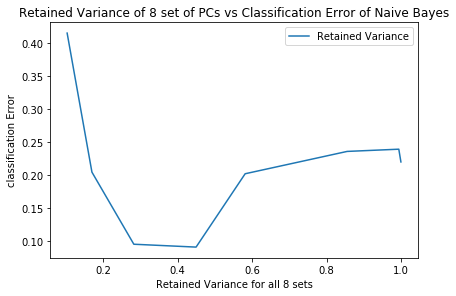

In [54]:
plt.plot(retained_variance, classification_error, label = 'Retained Variance', linestyle='-')
plt.xlabel('Retained Variance for all 8 sets')
plt.ylabel('classification Error')
plt.legend(loc='best')
plt.tight_layout()
plt.title("Retained Variance of 8 set of PCs vs Classification Error of Naive Bayes")
plt.show()

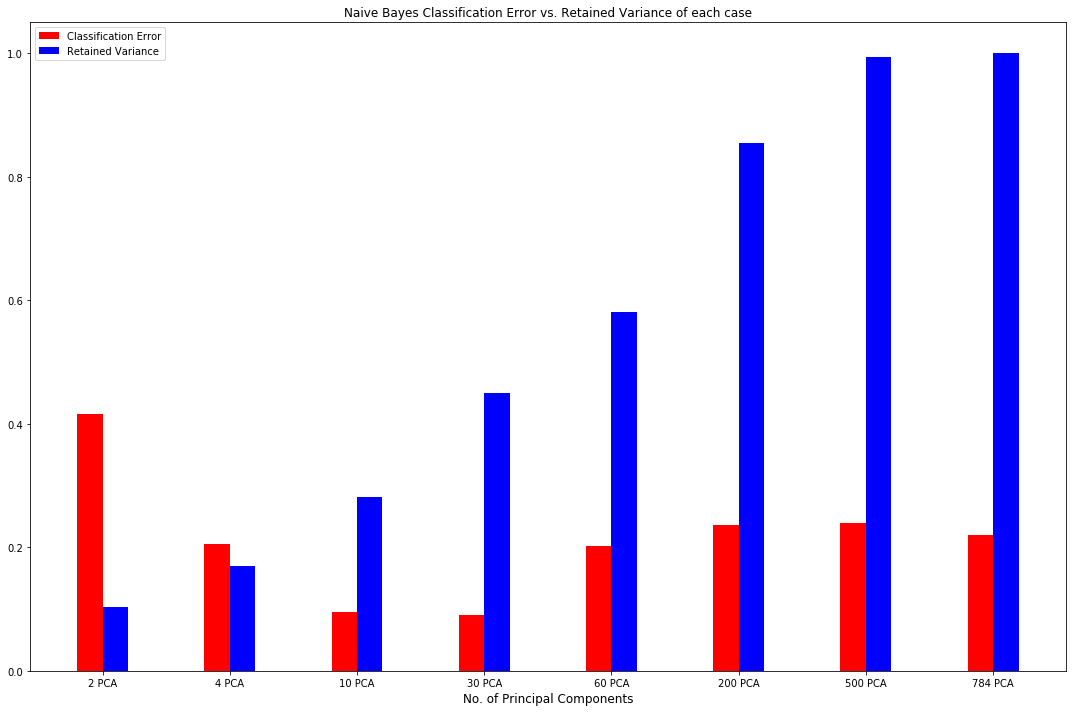

In [55]:
# Bar Plot 
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('No. of Principal Components',fontsize = 12)
ax.set_title('Naive Bayes Classification Error vs. Retained Variance of each case')
index = np.arange(len(classification_error))
bar_width = 0.2
opacity = 1
rects1 = ax.bar(index, np.array(classification_error), bar_width, alpha=opacity, color='r', label='Classification Error')
rects2 = ax.bar(index + bar_width, np.array(retained_variance), bar_width, alpha=opacity, color='b', label='Retained Variance')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('2 PCA', '4 PCA', '10 PCA', '30 PCA', '60 PCA', '200 PCA','500 PCA', '784 PCA'))
ax.legend()
fig.tight_layout()
plt.show()

### Analysis:  
#### As seen from the graph it is clear that the classification error is highest when the variance in the dataset is slowest for 2PCs and for this the classification error is higher than 40%. However this error decreases with increase in principle components up until 30 PCs and at this set of PCs the accuracy score is highest given by the classifier to 90.949% and the classificaiton error is lowest among all PCs. As evident from the graph the classification error increase after the set of 30 PCs and for all PCs (784 for this dataset) the classification error is at around 22%.

### Name: Harleen Kaur Taunque
#### Student Id : 20811951
### Name: Somesh Kumar Gupta
#### Student Id : 20817245


# Dimensionality Reduction using LDA

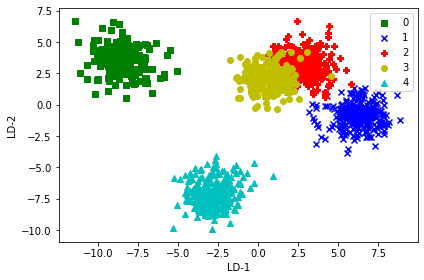

In [56]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std_q2, y_train_values_q2)

colors = ['g', 'b', 'r', 'y', 'c']
markers = ['s', 'x', 'P', 'o', '^']
for index, color, marker in zip(np.unique(y_train_values_q2), colors, markers):
    plt.scatter(X_train_lda[y_train_values_q2==index, 0], X_train_lda[y_train_values_q2==index, 1] * (-1), c = color, label = index, marker = marker)

plt.xlabel('LD-1')
plt.ylabel('LD-2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Analysis: 
#### On comparing the dataset when it is projected using the first two components PCA and LDA, LDA gives a plot in which the class labels '0' and '4' are linearly sepearable from other classes as compared the plot by PCA. The class label '1' in the plot by LDA is distinguishable from the class labels '2' and '3' however a few points overlap with the class label '2' points. In the same plot, class label '3' and class label '2' cannot be seperated linearly. In the plot by PCA the all class labels are linearly inseperable from one another and they overlap one another. 

### Name: Harleen Kaur Taunque
#### Student Id : 20811951
### Name: Somesh Kumar Gupta
#### Student Id : 20817245


# Question 2.6

<img src="q2_6_1.jpeg">
<img src="q2_6_2.jpeg">

### Name: Harleen Kaur Taunque
#### Student Id : 20811951
### Name: Somesh Kumar Gupta
#### Student Id : 20817245


# Q3.1 LLE on Digit '3'

In [57]:
# Select the data for the digit 3 in the Dataset

dataB_updatedDig3 = (dataB_updated.loc[dataB_updated['gnd'] == 3])
print("\n DataB after removing Unnamed column: \n",dataB_updatedDig3.head(1))


 DataB after removing Unnamed column: 
      fea.1  fea.2  fea.3  fea.4  fea.5  fea.6  fea.7  fea.8  fea.9  fea.10  \
1237      3      4      2      1      3      3      0      1      2       0   

      fea.11  fea.12  fea.13  fea.14  fea.15  fea.16  fea.17  fea.18  fea.19  \
1237       3       0       5       3       3       2       1       3       0   

      fea.20  fea.21  fea.22  fea.23  fea.24  fea.25  fea.26  fea.27  fea.28  \
1237       4       2       3       3       3       1       4       3       1   

      fea.29  fea.30  fea.31  fea.32  fea.33  fea.34  fea.35  fea.36  fea.37  \
1237       1       5       3       4       2       5       3       4       4   

      fea.38  fea.39  fea.40  fea.41  fea.42  fea.43  fea.44  fea.45  fea.46  \
1237       2       4       3       4       4       3       3       2       0   

      fea.47  fea.48  fea.49  fea.50  fea.51  fea.52  fea.53  fea.54  fea.55  \
1237       2       1       3       1       1       1       2       3       1 

In [58]:
print("\n Total number of samples for class label 3: ",(dataB_updatedDig3.gnd.value_counts()))


 Total number of samples for class label 3:  3    398
Name: gnd, dtype: int64


#### Total number of class label '3' samples are 398

In [59]:
dataB_updatedDig3_X = dataB_updatedDig3.drop(['gnd'], axis=1)
print("\n Feature set for class label'3': \n", dataB_updatedDig3_X.head(1))



 Feature set for class label'3': 
      fea.1  fea.2  fea.3  fea.4  fea.5  fea.6  fea.7  fea.8  fea.9  fea.10  \
1237      3      4      2      1      3      3      0      1      2       0   

      fea.11  fea.12  fea.13  fea.14  fea.15  fea.16  fea.17  fea.18  fea.19  \
1237       3       0       5       3       3       2       1       3       0   

      fea.20  fea.21  fea.22  fea.23  fea.24  fea.25  fea.26  fea.27  fea.28  \
1237       4       2       3       3       3       1       4       3       1   

      fea.29  fea.30  fea.31  fea.32  fea.33  fea.34  fea.35  fea.36  fea.37  \
1237       1       5       3       4       2       5       3       4       4   

      fea.38  fea.39  fea.40  fea.41  fea.42  fea.43  fea.44  fea.45  fea.46  \
1237       2       4       3       4       4       3       3       2       0   

      fea.47  fea.48  fea.49  fea.50  fea.51  fea.52  fea.53  fea.54  fea.55  \
1237       2       1       3       1       1       1       2       3       1   

 

In [60]:
dataB_updatedDig3_y = dataB_updatedDig3['gnd']
print(" \n Target of the Samples: \n",dataB_updatedDig3_y)


 Target of the Samples: 
 1237    3
1238    3
1239    3
1240    3
1241    3
       ..
1630    3
1631    3
1632    3
1633    3
1634    3
Name: gnd, Length: 398, dtype: int64


In [61]:
# Standardise the Dataset 
ss = StandardScaler()
dataB_updatedDig3_X_std = ss.fit_transform(dataB_updatedDig3_X)

In [62]:
# import LLE from sklearn 
lle = LocallyLinearEmbedding(n_neighbors= 5, n_components=2, eigen_solver= 'auto',n_jobs=-1)

dataB_updatedDig3_X_std_lletranformed = lle.fit_transform(dataB_updatedDig3_X_std)

print("\n LLE transformed.shape: ",dataB_updatedDig3_X_std_lletranformed.shape)
print("\n LLE transformed dataset: \n",dataB_updatedDig3_X_std_lletranformed)




 LLE transformed.shape:  (398, 2)

 LLE transformed dataset: 
 [[ 9.10719497e-02 -3.99905516e-03]
 [-2.62063604e-02  3.78066899e-02]
 [-2.25154852e-02 -7.10526771e-02]
 [ 2.00312829e-02 -2.91544841e-02]
 [-3.20756256e-02 -2.45594602e-02]
 [-3.38424944e-02  8.28817294e-02]
 [ 8.57672795e-03 -1.74151054e-03]
 [-1.96805864e-02 -1.13777768e-01]
 [-3.26349266e-02  1.84248320e-02]
 [-3.23297606e-02 -3.76254399e-02]
 [-3.24903532e-02  1.67202108e-02]
 [ 1.29861791e-01  1.50906403e-03]
 [ 4.85361317e-02 -1.65235559e-02]
 [-2.64787481e-02  3.94191117e-02]
 [ 1.30945930e-01 -4.58479026e-03]
 [-3.30604653e-02 -6.61983654e-02]
 [-1.50579773e-02 -6.57502703e-02]
 [ 1.54489170e-01  4.82377807e-03]
 [ 5.47302899e-02  3.68884280e-03]
 [ 4.56940158e-02  1.52936845e-02]
 [-2.65374083e-02 -7.09758783e-03]
 [ 6.31664952e-02  7.03861345e-03]
 [ 2.77838596e-02  3.73207527e-02]
 [ 1.11458775e-01 -2.15929835e-02]
 [-3.42269791e-02 -4.25947406e-02]
 [ 1.61450166e-01 -1.27490845e-04]
 [ 6.45572547e-02 -4.02177

In [63]:
# Plot the text of the target on the Transformed data in the 2D space
def plot_text(X):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(dataB_updatedDig3_y.values[i]),
                 color=plt.cm.Set1(dataB_updatedDig3_y.values[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})


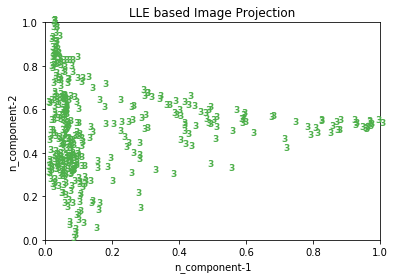

In [64]:
# Plot for only the Text data for the labels after Projection on to the 2D space
plot_text(dataB_updatedDig3_X_std_lletranformed)
plt.xlabel('n_component-1')
plt.ylabel('n_component-2')
plt.title('LLE based Image Projection')
plt.show()

In [65]:
# Image data from the flattened Dataset
global images_list 
images_list = []
for value in range(dataB_updatedDig3_X.shape[0]):
    image = dataB_updatedDig3_X.iloc[[value],:]
    image_new = image.values.reshape(28,28)
    images_list.append(image_new)
    

In [66]:
# Graph plot for the Transformed Images
def plot_images(X):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(50,30))
    ax = plt.subplot(111)

    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])  
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images_list[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)


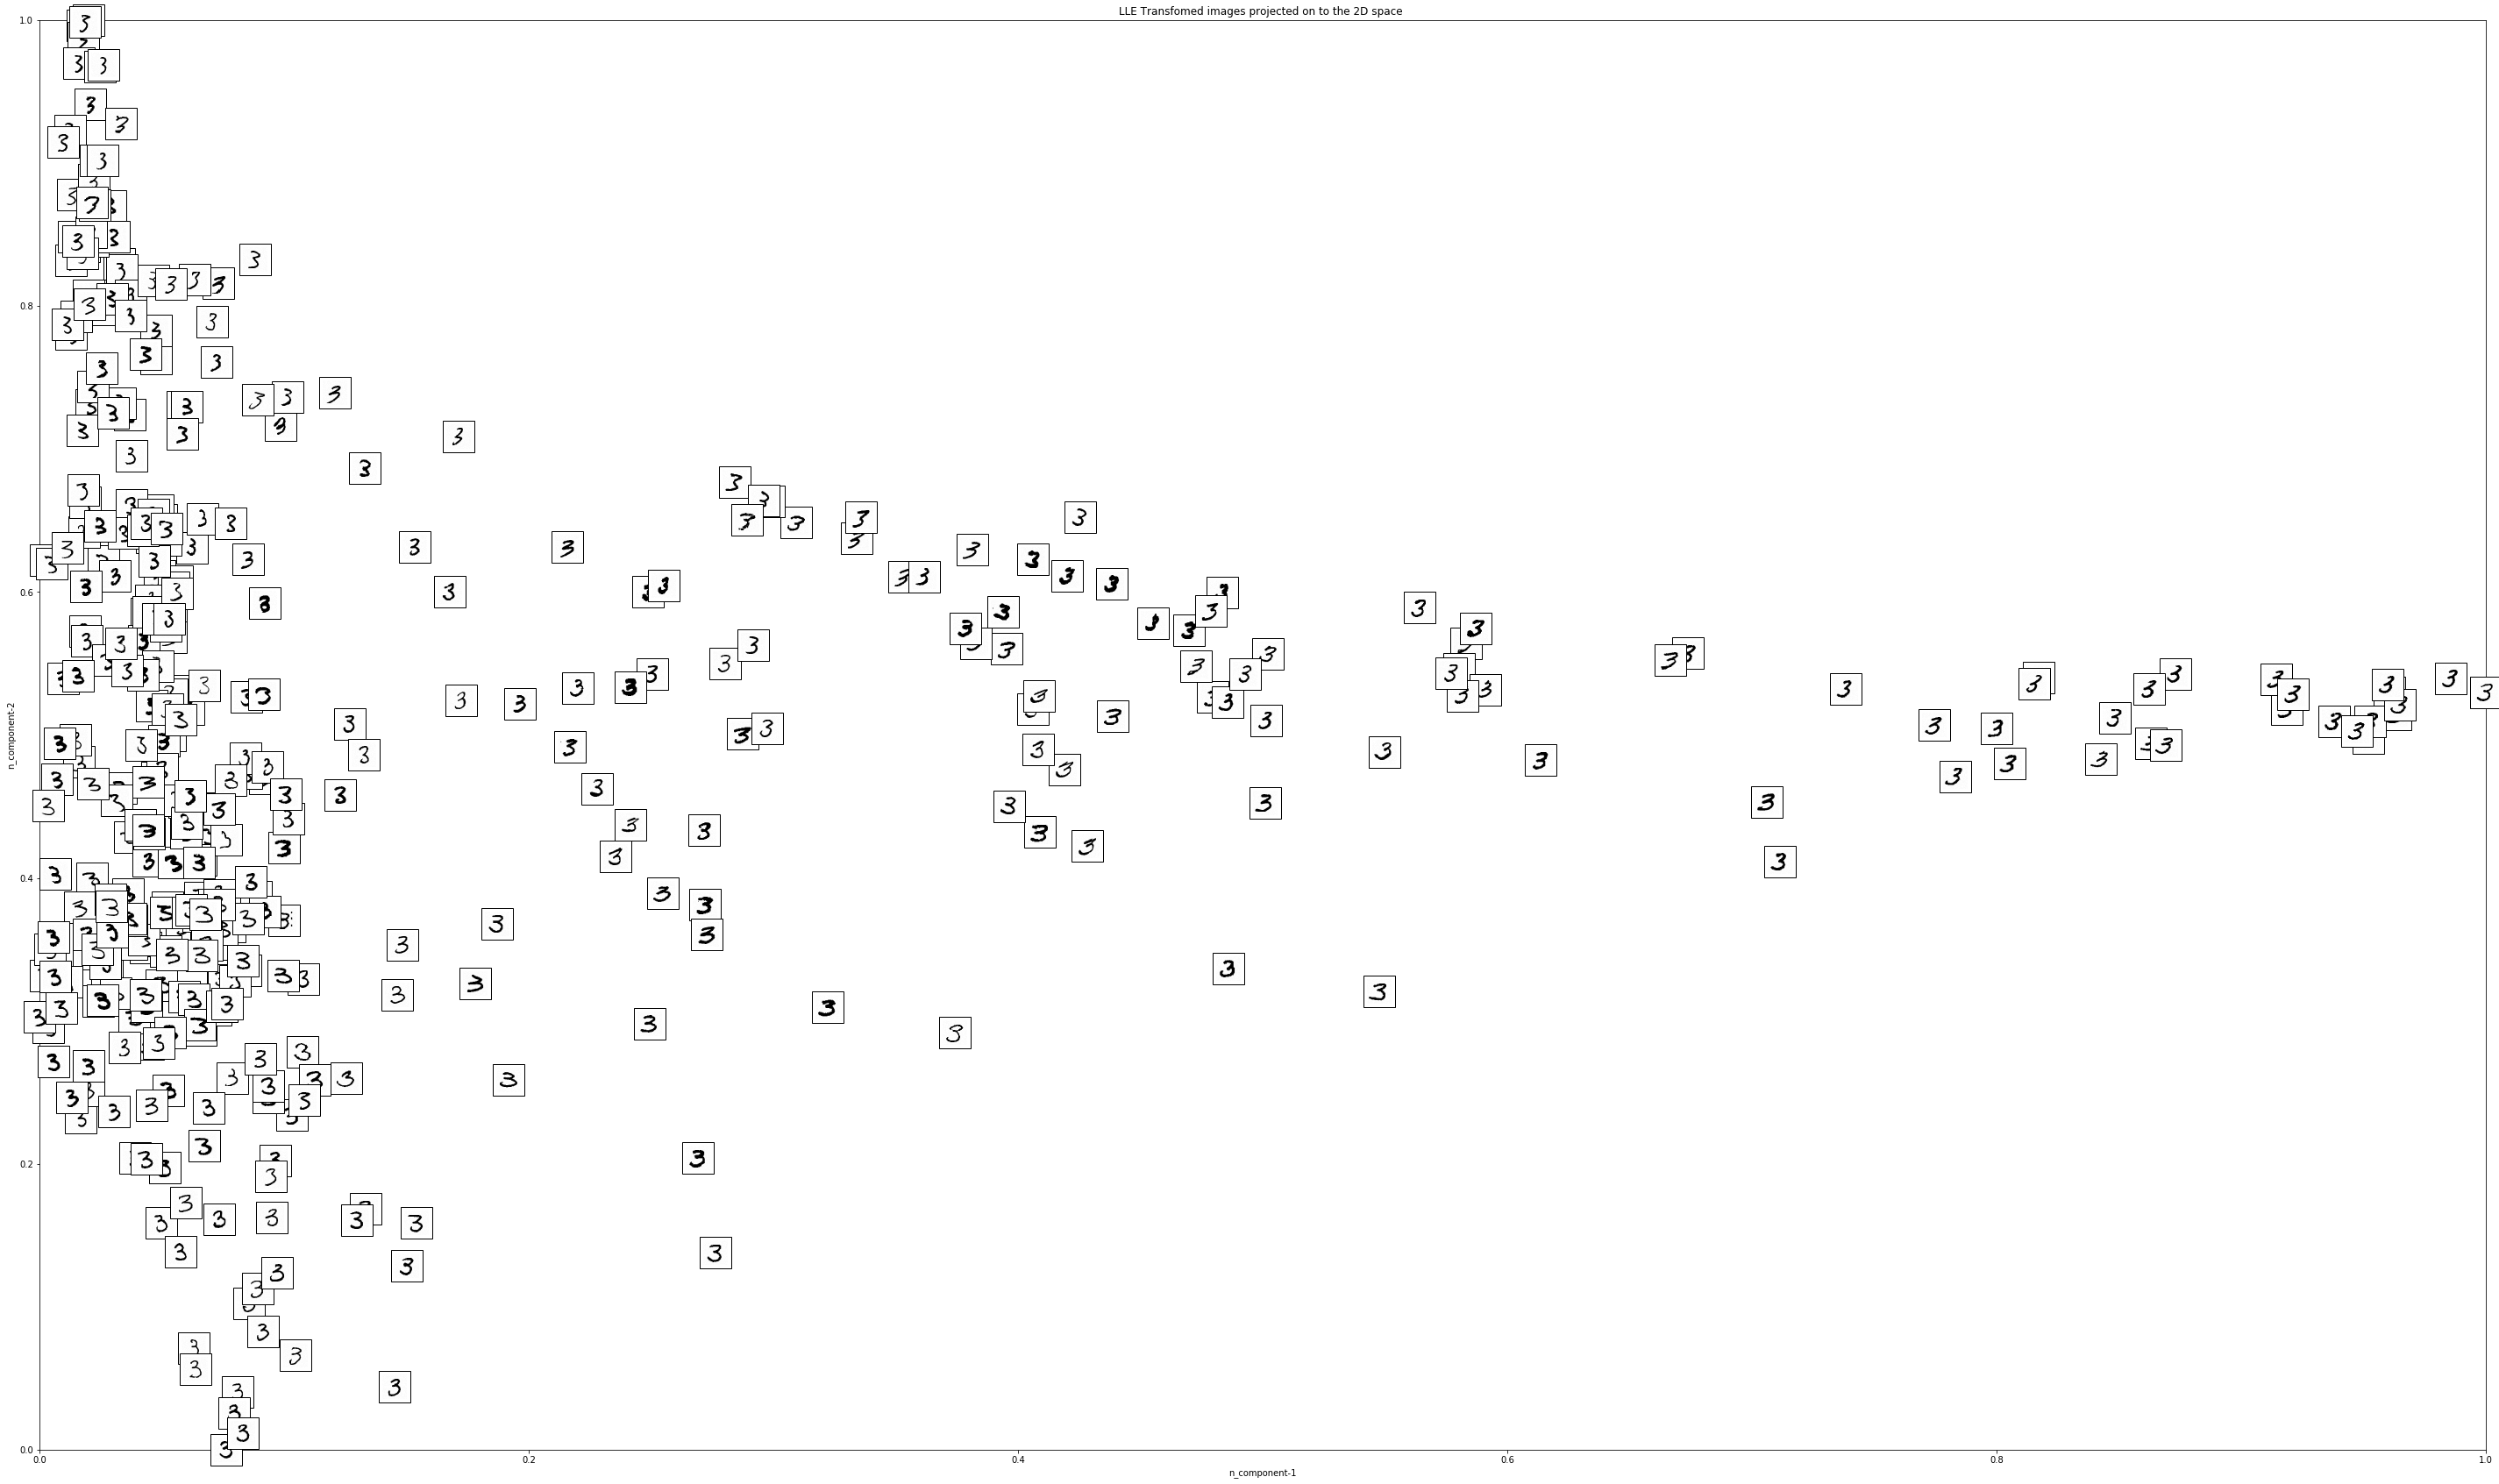

In [67]:
plot_images(dataB_updatedDig3_X_std_lletranformed)
plt.xlabel("n_component-1")
plt.ylabel("n_component-2")
plt.title("LLE Transfomed images projected on to the 2D space ")
plt.show()


## Analysis: 
#### The image of the target from the tranformed LLE space is projected onto the 2D space. On the x-axis(n_component-1) before 0.2 scale and between the scale 0.4 and 0.8 along the y-axis(n_components-2)  some images have the font as thick and dark, whereas this is not the case on the left side below the scale 0.2 along the y-axis and near the point 0 of the x-axis. In addition on the y-axis between 0.5 and 0.7 some images are left skewed whereas below the point 0.4 most of the images are straight or aligned. When we move along the direction of x-axis images slightly start to skew more towards the right mainly starting from 0.2 on the x-axis and this skewness towards the right increases when we move further along the x-axis and as we can see almost all the images are slightly skewed towards the right. In addition, most of the data is before the point 0.2 on the x-axis and between 0.8 and 0.2 on the y-axis. LLE preserves the distances between the neighbouring points and orientation of the data corresponds to actual difference between the distance of the images. LLE is a local method or it is locally based.


### Name: Harleen Kaur Taunque
#### Student Id : 20811951
### Name: Somesh Kumar Gupta
#### Student Id : 20817245


## Q3.2 Isomap

In [68]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=5, n_components=2, eigen_solver='auto', n_jobs=-1)
dataB_updatedDig3_X_std_iso = iso.fit_transform(dataB_updatedDig3_X_std)
print(dataB_updatedDig3_X_std_iso)

[[ 4.17628882e+01  2.97184109e+01]
 [ 1.22218469e+01 -1.29602130e+00]
 [-4.11315359e+01 -1.47833341e+01]
 [ 1.48745601e+01  3.49439933e+01]
 [-7.22317227e+01  3.67584434e+00]
 [-4.82496235e+01  5.86685573e+01]
 [ 3.02938431e+01  1.68316111e+01]
 [-7.04809014e+00 -3.46344784e+01]
 [-2.44896634e+01  8.20526431e+00]
 [-8.74492108e+01 -1.13534329e+01]
 [-2.20362925e+01  8.83215664e+00]
 [ 6.89864402e+01  1.12405376e+01]
 [ 4.34590278e+01  3.44601285e+01]
 [-6.16309866e+00  1.34355826e+01]
 [ 7.75609460e+01  4.96522542e+00]
 [-3.91986663e+01  7.09578154e+00]
 [-1.30951707e+01 -5.77542041e+00]
 [ 9.16906874e+01  2.21074843e+01]
 [ 4.30083293e+01  5.27538895e+01]
 [ 5.81499604e+01  7.79888912e+01]
 [-4.68323392e+01  3.26470550e+00]
 [ 4.86839300e+01  5.70361402e+01]
 [ 3.93574747e+01  9.68324926e+01]
 [ 5.29946742e+01 -8.31505018e+00]
 [-6.67424158e+01  3.64979314e+00]
 [ 7.96059721e+01 -1.52870948e+00]
 [ 4.24255349e+01 -2.12575398e+01]
 [-6.55080202e+01 -1.52423251e+01]
 [ 6.51896702e-01 -5

In [69]:
dataB_updatedDig3_X_std_iso.shape

(398, 2)

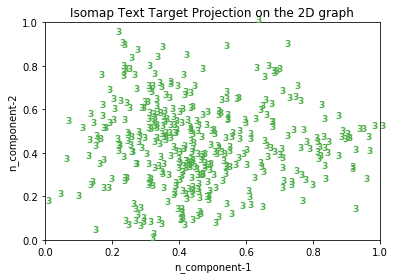

In [70]:

plot_text(dataB_updatedDig3_X_std_iso)
plt.xlabel('n_component-1')
plt.ylabel('n_component-2')
plt.title('Isomap Text Target Projection on the 2D graph')
plt.show()

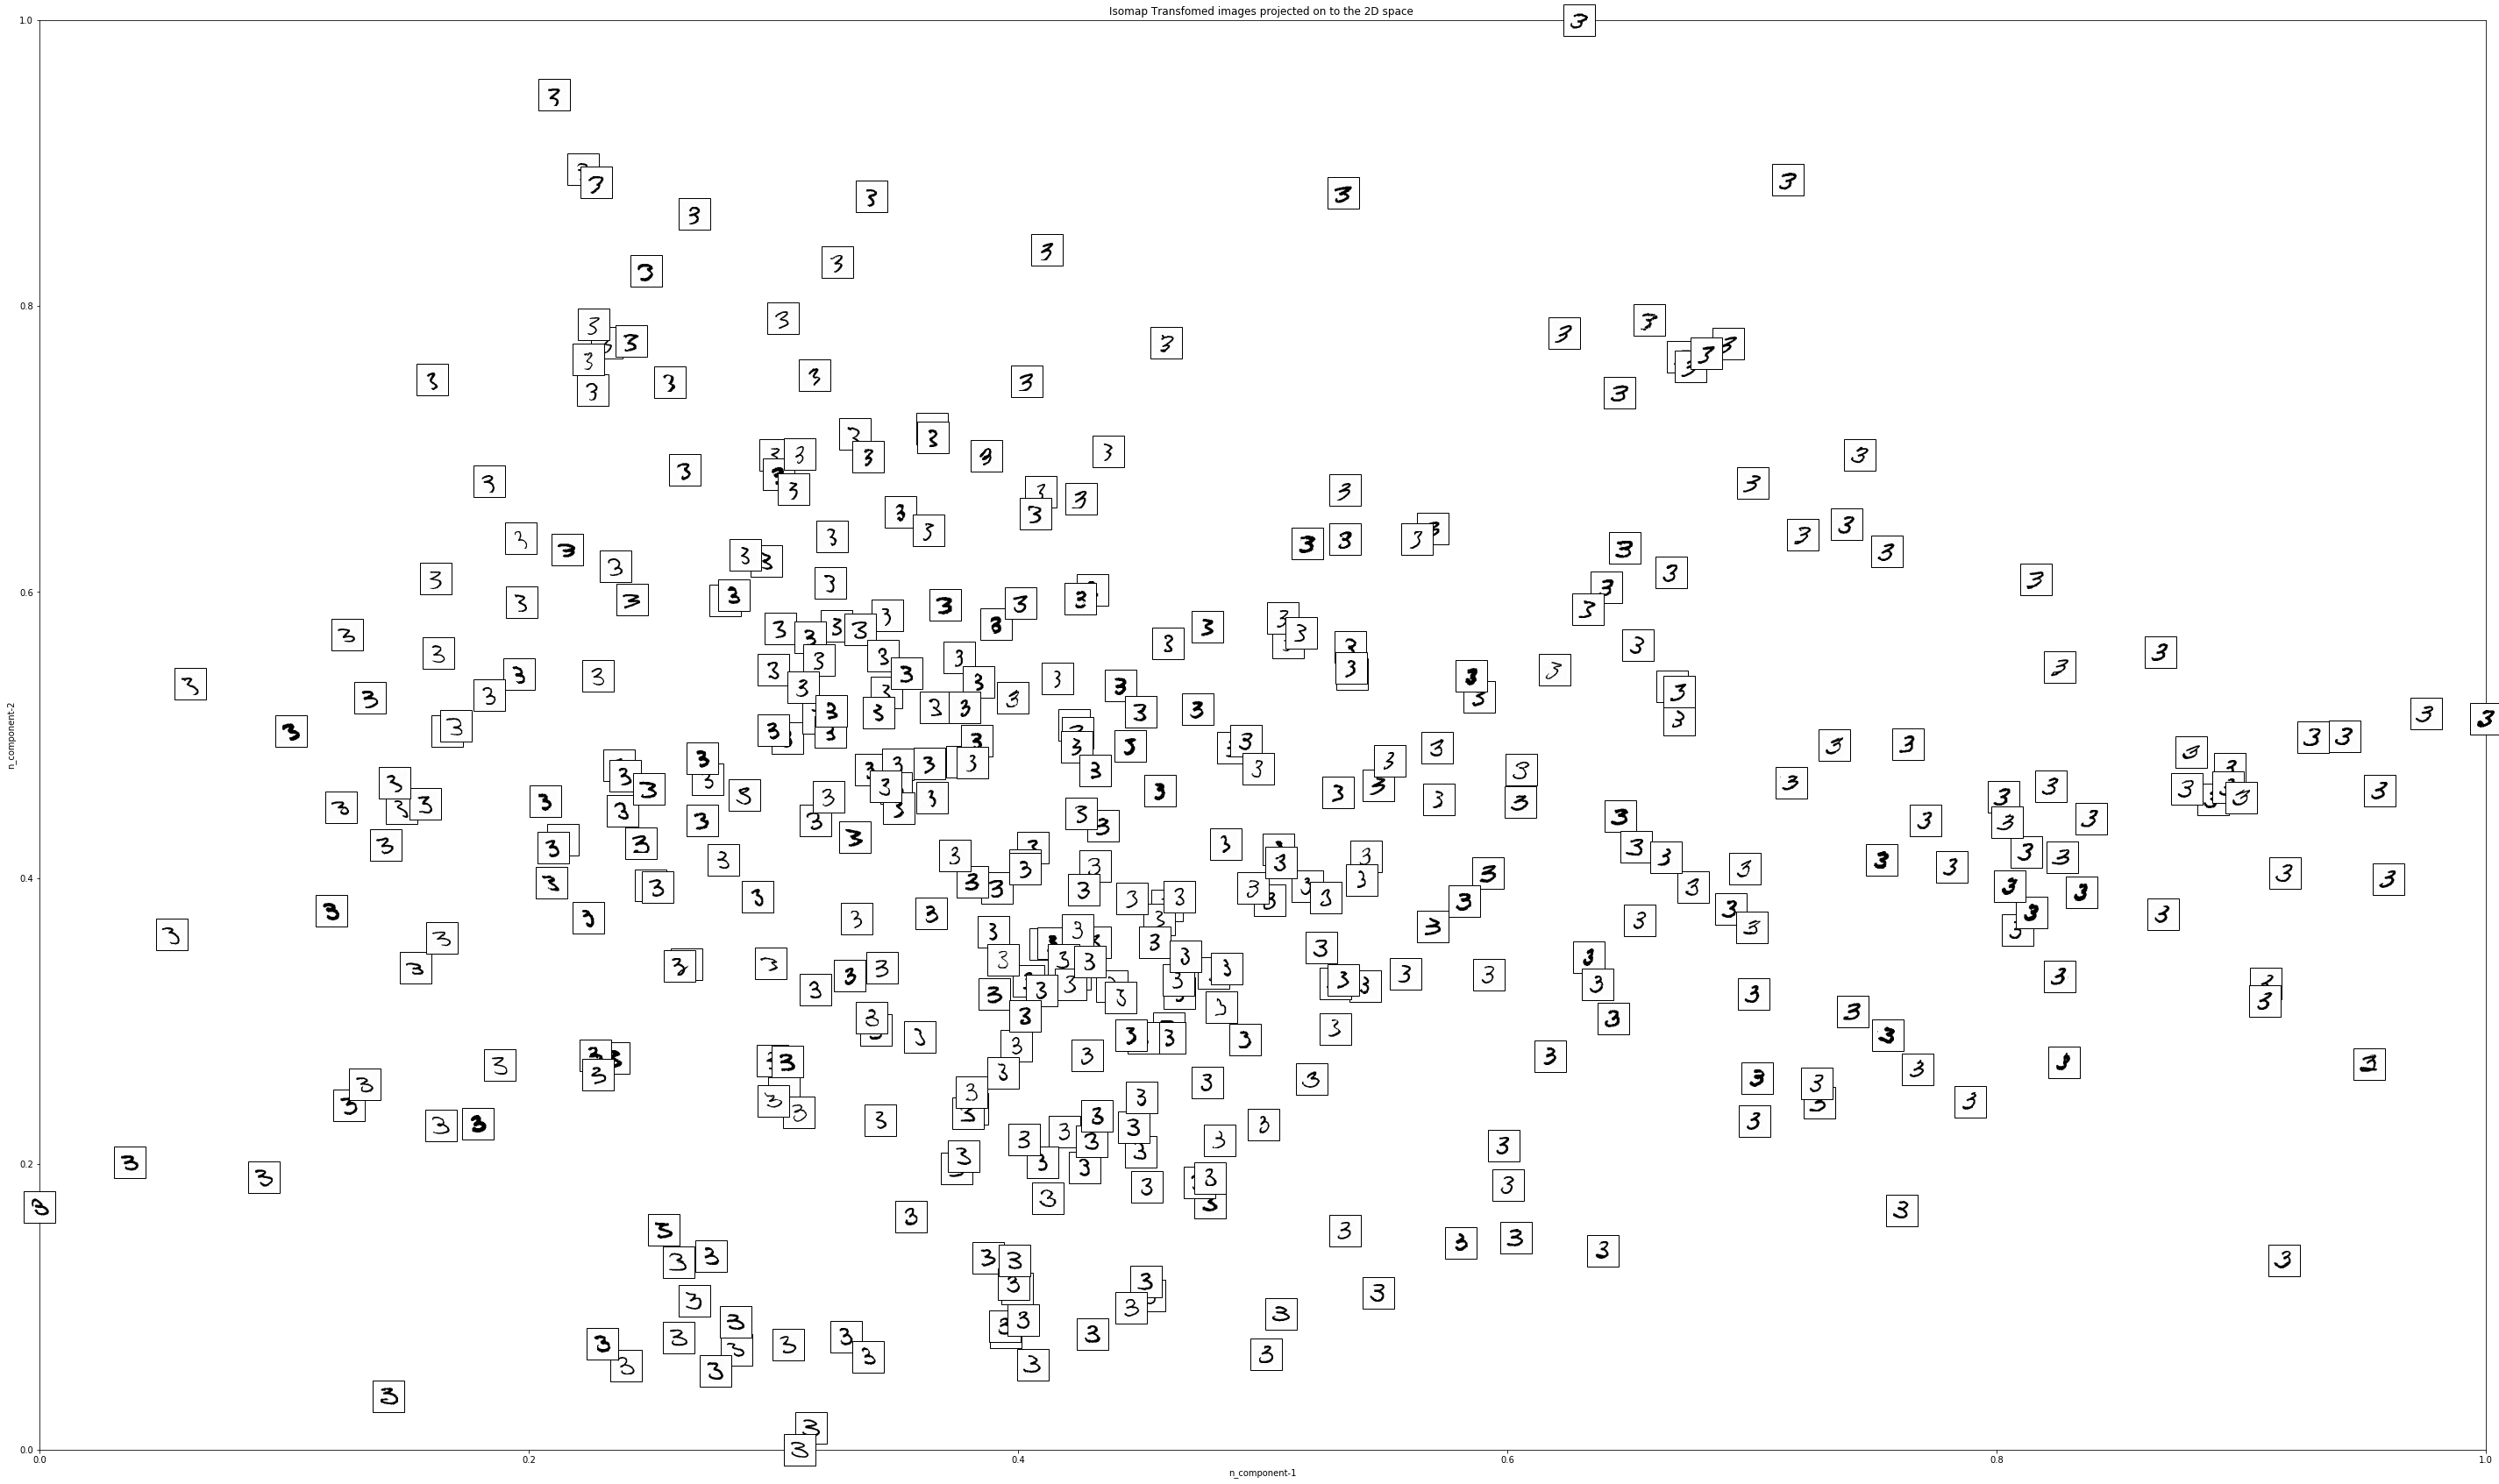

In [71]:
# Image projection on to the 2D space of the Isomap transformed dataset
plot_images(dataB_updatedDig3_X_std_iso)
plt.xlabel("n_component-1")
plt.ylabel("n_component-2")
plt.title("Isomap Transfomed images projected on to the 2D space ")
plt.show()


## Analysis: 
#### The plot above shows the Isomap transformed data projected on to the 2D space. It is evident from the plot that the data is widely spread along both the axis. The data which are projected on to the left side of x-axis mainly before 0.2 on the x-axis and in between 0.3 and 0.6 on the y-axis are slightly skewed towards the left and this skewness slightly decreases when we move along the y-axis towards up. In addition, the data between 0.2 and 0.5 are aligned properly with some exception of data that begins to skew slightly towards the right. When we move along the x-axis after 0.5 on the x-axis it is evident that most of the data is skewed towards the right. Another point to note is that in the plot the images near to each other seems alike for example on the x-axis between the scale 0.2 and 0.4 there is a group of data that is skewed with similar skewness so it looks like a group.There is no pattern in darkness of images in Isomap. It also captures the orientation in the images. Iso map is better in the sense that Isomap tries to preserve the distances along the manifold using geodesic distance whereas the LLE only focuses on local properties or linear patches. However, Isomap is computationally more demanding than LLE as it calculates pairwise curvilinear distances. The patterns found in Isomap are Global based whereas in LLE it is a Local method or Locally Based as mentioned in the above analysis.



### Name: Harleen Kaur Taunque
#### Student Id : 20811951
### Name: Somesh Kumar Gupta
#### Student Id : 20817245


# Q3.3 Naive Bayes classifier using LLE 

In [72]:
# Split the Dataset into 70% and 30% ratio 
dataB_3X_train, dataB_3X_test, dataB_3y_train, dataB_3y_test = train_test_split(dataB_X, dataB_y, test_size=0.30, random_state=42)

print("\n Dimension of Training set: ",dataB_3X_train.shape)


 Dimension of Training set:  (1446, 784)


In [73]:
dataB_3y_train_values = dataB_3y_train.values
dataB_3y_test_values = dataB_3y_test.values
print("Dimension of Training Labels: ",dataB_3y_train_values.shape)


Dimension of Training Labels:  (1446,)


In [74]:
ss = StandardScaler()
dataB_3X_train_std = ss.fit_transform(dataB_3X_train)
dataB_3X_test_std = ss.fit_transform(dataB_3X_test)

In [75]:
lle_q3 = LocallyLinearEmbedding(n_neighbors=5, n_components=4, eigen_solver='auto', n_jobs=-1)
dataB_3X_train_std_lleq3 = lle_q3.fit_transform(dataB_3X_train_std)
dataB_3X_test_std_lleq3 = lle_q3.fit_transform(dataB_3X_test_std)


In [76]:
print("\n Dimension of LLE transformed dataset: ",dataB_3X_train_std_lleq3.shape)


 Dimension of LLE transformed dataset:  (1446, 4)


In [77]:
# Initialize the Gaussian Naive Bayes Classifier 
gnb_lleq3 = GaussianNB()
gnb_lleq3.fit(dataB_3X_train_std_lleq3, dataB_3y_train_values)
lleq3_y_pred = gnb_lleq3.predict(dataB_3X_test_std_lleq3)


In [78]:
# Accuracy Score for Isomap dataset with Naive bayes classifier
accuracy_score_lleq3 = accuracy_score(dataB_3y_test_values, lleq3_y_pred)
print(" \n Accuracy Score for LLE Transformed dataset using Naive Bayes: {0:.3f}".format(accuracy_score_lleq3 * 100))


 Accuracy Score for LLE Transformed dataset using Naive Bayes: 12.419


### Training the classifier with different folds of datasets with LLE

In [79]:
# Training with Straitified K fold as this preserves the class distribution 
kfold = StratifiedKFold(n_splits = 10).split(dataB_3X_train_std_lleq3, dataB_3y_train_values)
Accuracy_Score = []

for index, (train, test) in enumerate(kfold):
    gnb_lleq3.fit(dataB_3X_train_std_lleq3[train], dataB_3y_train_values[train])
    lleq_y_pred = gnb_lleq3.predict(dataB_3X_train_std_lleq3[test])
    accuracy_score_kfold = accuracy_score(lleq_y_pred, dataB_3y_train_values[test])
    Accuracy_Score.append(accuracy_score_kfold)
    sys.stderr.write('\n Fold: {0}, Class Distribution: {1}, Accuracy_Score: {2:.3f}'.format(index+1, np.bincount(dataB_3y_train_values[train]), accuracy_score_kfold))
    sys.stderr.flush()

sys.stderr.write("\n Mean Accuracy: {0:.3f} +/- {1:0.3f}".format(np.mean(Accuracy_Score), np.std(Accuracy_Score)))
sys.stderr.flush()


 Fold: 1, Class Distribution: [228 280 282 235 276], Accuracy_Score: 0.807
 Fold: 2, Class Distribution: [228 280 282 235 276], Accuracy_Score: 0.862
 Fold: 3, Class Distribution: [228 280 281 236 276], Accuracy_Score: 0.828
 Fold: 4, Class Distribution: [228 280 281 236 276], Accuracy_Score: 0.848
 Fold: 5, Class Distribution: [228 280 281 236 276], Accuracy_Score: 0.793
 Fold: 6, Class Distribution: [227 280 282 236 276], Accuracy_Score: 0.807
 Fold: 7, Class Distribution: [227 280 282 236 277], Accuracy_Score: 0.819
 Fold: 8, Class Distribution: [227 280 282 236 277], Accuracy_Score: 0.840
 Fold: 9, Class Distribution: [228 279 282 236 277], Accuracy_Score: 0.826
 Fold: 10, Class Distribution: [228 280 282 236 276], Accuracy_Score: 0.792
 Mean Accuracy: 0.822 +/- 0.022

### Analysis: 
#### In the above code the training dataset is split into 10 folds and then the training of the Classifier is performed. Here with 10 fold the Mean Accuracy of the Classifier is 82.3% with standard devaition of 2.2%. One main reason for choosing 10 iteration is to put in account the variation in accuracy of the completed dataset. 

### Name: Harleen Kaur Taunque
#### Student Id : 20811951
### Name: Somesh Kumar Gupta
#### Student Id : 20817245


# Q3.3 Naive Bayes classifier using IsoMap

In [80]:
isomap_q3 = Isomap(n_neighbors=5, n_components=4, eigen_solver='auto', n_jobs=-1)
dataB_3X_train_std_isoq3 = isomap_q3.fit_transform(dataB_3X_train_std)
dataB_3X_test_std_isoq3 = isomap_q3.fit_transform(dataB_3X_test_std)


In [81]:
gnb_isoq3 = GaussianNB()
gnb_isoq3.fit(dataB_3X_train_std_isoq3, dataB_3y_train_values)
isoq3_y_pred = gnb_isoq3.predict(dataB_3X_test_std_isoq3)



In [82]:
accuracy_score_isoq3 = accuracy_score(dataB_3y_test_values, isoq3_y_pred)
print(" \n Accuracy Score for Isomap Transformed dataset using Naive Bayes: {0:.3f}", accuracy_score_isoq3 * 100)



 Accuracy Score for Isomap Transformed dataset using Naive Bayes: {0:.3f} 68.06451612903226


## Training the classifier with different folds of datasets

In [83]:

kfold = StratifiedKFold(n_splits = 10).split(dataB_3X_train_std_isoq3, dataB_3y_train_values)
Accuracy_Score_Isomapq3 = []

for index, (train, test) in enumerate(kfold):
    gnb_isoq3.fit(dataB_3X_train_std_isoq3[train], dataB_3y_train_values[train])
    isoq3_y_pred = gnb_isoq3.predict(dataB_3X_train_std_isoq3[test])
    accuracy_score_kfold_isomapq3 = accuracy_score(isoq3_y_pred, dataB_3y_train_values[test])
    Accuracy_Score_Isomapq3.append(accuracy_score_kfold_isomapq3)
    sys.stderr.write('\n Fold: {0}, Class Distribution: {1}, Accuracy_Score: {2:.3f}'.format(index+1, np.bincount(dataB_3y_train_values[train]), accuracy_score_kfold_isomapq3))
    sys.stderr.flush()

sys.stderr.write("\n Mean Accuracy: {0:.3f} +/- {1:0.3f}".format(np.mean(Accuracy_Score_Isomapq3), np.std(Accuracy_Score_Isomapq3)))
sys.stderr.flush()


 Fold: 1, Class Distribution: [228 280 282 235 276], Accuracy_Score: 0.821
 Fold: 2, Class Distribution: [228 280 282 235 276], Accuracy_Score: 0.807
 Fold: 3, Class Distribution: [228 280 281 236 276], Accuracy_Score: 0.821
 Fold: 4, Class Distribution: [228 280 281 236 276], Accuracy_Score: 0.834
 Fold: 5, Class Distribution: [228 280 281 236 276], Accuracy_Score: 0.855
 Fold: 6, Class Distribution: [227 280 282 236 276], Accuracy_Score: 0.834
 Fold: 7, Class Distribution: [227 280 282 236 277], Accuracy_Score: 0.806
 Fold: 8, Class Distribution: [227 280 282 236 277], Accuracy_Score: 0.889
 Fold: 9, Class Distribution: [228 279 282 236 277], Accuracy_Score: 0.785
 Fold: 10, Class Distribution: [228 280 282 236 276], Accuracy_Score: 0.875
 Mean Accuracy: 0.833 +/- 0.031

### Analysis: 
#### The training dataset is split into 10 folds and then the training of the Classifier is performed with Isomap transformed dataset. Here with 10 fold the Mean Accuracy of the Classifier is 83.3% with standard devaition of 3.1%. One main reason for choosing 10 iteration is to put in account the variation in accuracy over the complete dataset. 

### Name: Harleen Kaur Taunque
#### Student Id : 20811951
### Name: Somesh Kumar Gupta
#### Student Id : 20817245


# Q3.3 Naive Bayes classifier using PCA transformed dataset

In [84]:
pca_q3 = PCA(n_components=4)
dataB_3X_train_std_pcaq3 = pca_q3.fit_transform(dataB_3X_train_std)
dataB_3X_test_std_pcaq3 = pca_q3.fit_transform(dataB_3X_test_std)


In [85]:
gnb_pcaq3 = GaussianNB()
gnb_pcaq3.fit(dataB_3X_train_std_pcaq3, dataB_3y_train_values)
isoq3_y_pred = gnb_pcaq3.predict(dataB_3X_test_std_pcaq3)


In [86]:
accuracy_score_isoq3 = accuracy_score(dataB_3y_test_values, isoq3_y_pred)
print(" \n Accuracy Score for Isomap Transformed dataset using Naive Bayes: {0:.3f}", accuracy_score_isoq3 * 100)




 Accuracy Score for Isomap Transformed dataset using Naive Bayes: {0:.3f} 43.38709677419355


## Training the classifier with different folds of datasets

In [87]:
kfold = StratifiedKFold(n_splits = 10).split(dataB_3X_train_std_pcaq3, dataB_3y_train_values)
Accuracy_Score_PCAq3 = []

for index, (train, test) in enumerate(kfold):
    gnb_pcaq3.fit(dataB_3X_train_std_pcaq3[train], dataB_3y_train_values[train])
    pcaq3_y_pred = gnb_pcaq3.predict(dataB_3X_train_std_pcaq3[test])
    accuracy_score_kfold_q3_pca= accuracy_score(pcaq3_y_pred, dataB_3y_train_values[test])
    Accuracy_Score_PCAq3.append(accuracy_score_kfold_q3_pca)
    sys.stderr.write('\n Fold: {0}, Class Distribution: {1}, Accuracy_Score: {2:.3f}'.format(index+1, np.bincount(dataB_3y_train_values[train]), accuracy_score_kfold_q3_pca))
    sys.stderr.flush()

sys.stderr.write("\n Mean Accuracy: {0:.3f} +/- {1:0.3f}".format(np.mean(Accuracy_Score_PCAq3), np.std(Accuracy_Score_PCAq3)))
sys.stderr.flush()


 Fold: 1, Class Distribution: [228 280 282 235 276], Accuracy_Score: 0.779
 Fold: 2, Class Distribution: [228 280 282 235 276], Accuracy_Score: 0.821
 Fold: 3, Class Distribution: [228 280 281 236 276], Accuracy_Score: 0.807
 Fold: 4, Class Distribution: [228 280 281 236 276], Accuracy_Score: 0.841
 Fold: 5, Class Distribution: [228 280 281 236 276], Accuracy_Score: 0.834
 Fold: 6, Class Distribution: [227 280 282 236 276], Accuracy_Score: 0.821
 Fold: 7, Class Distribution: [227 280 282 236 277], Accuracy_Score: 0.819
 Fold: 8, Class Distribution: [227 280 282 236 277], Accuracy_Score: 0.826
 Fold: 9, Class Distribution: [228 279 282 236 277], Accuracy_Score: 0.847
 Fold: 10, Class Distribution: [228 280 282 236 276], Accuracy_Score: 0.826
 Mean Accuracy: 0.822 +/- 0.018

### Analysis: 
#### In order to consistent with other methods the training dataset is split into 10 folds and then the training of the Classifier is performed with PCA transformed dataset. Here with 10 fold the Mean Accuracy of the Classifier is 82.2% with standard devaition of 1.8%. One main reason for choosing 10 iteration is to put in account the variation in accuracy over the complete dataset.

### Name: Harleen Kaur Taunque
#### Student Id : 20811951
### Name: Somesh Kumar Gupta
#### Student Id : 20817245


# Q3.3 Naive Bayes classifier using LDA transformed dataset

In [88]:
# LDA transformation on the train and test data
lda_q3 = LDA(n_components=4)
dataB_3X_train_std_ldaq3 = lda_q3.fit_transform(dataB_3X_train_std, dataB_3y_train_values)
dataB_3X_test_std_ldaq3 = lda_q3.fit_transform(dataB_3X_test_std, dataB_3y_test_values)

In [89]:
# Classifier initialiation 
gnb_ldaq3 = GaussianNB()
gnb_ldaq3.fit(dataB_3X_train_std_ldaq3, dataB_3y_train_values)
ldaq3_y_pred = gnb_ldaq3.predict(dataB_3X_test_std_ldaq3)

In [90]:
# Accuracy Calculation of LDA
accuracy_score_ldaq3 = accuracy_score(dataB_3y_test_values, ldaq3_y_pred)
print(" \n Accuracy Score for LDA Transformed dataset using Naive Bayes: {0:.3f}", accuracy_score_ldaq3 * 100)


 Accuracy Score for LDA Transformed dataset using Naive Bayes: {0:.3f} 100.0


## Training the classifier with different folds of datasets

In [91]:
# Training with Straitified K fold as this preserves the class distribution 
kfold = StratifiedKFold(n_splits = 10).split(dataB_3X_train_std_ldaq3, dataB_3y_train_values)
Accuracy_Score_LDA = []

for index, (train, test) in enumerate(kfold):
    gnb_ldaq3.fit(dataB_3X_train_std_ldaq3[train], dataB_3y_train_values[train])
    ldaq_y_pred = gnb_ldaq3.predict(dataB_3X_train_std_ldaq3[test])
    accuracy_score_kfold_lda = accuracy_score(ldaq_y_pred, dataB_3y_train_values[test])
    Accuracy_Score_LDA.append(accuracy_score_kfold_lda)
    sys.stderr.write('\n Fold: {0}, Class Distribution: {1}, Accuracy_Score: {2:.3f}'.format(index+1, np.bincount(dataB_3y_train_values[train]), accuracy_score_kfold_lda))
    sys.stderr.flush()

sys.stderr.write("\n Mean Accuracy: {0:.3f} +/- {1:0.3f}".format(np.mean(Accuracy_Score_LDA), np.std(Accuracy_Score_LDA)))
sys.stderr.flush()


 Fold: 1, Class Distribution: [228 280 282 235 276], Accuracy_Score: 1.000
 Fold: 2, Class Distribution: [228 280 282 235 276], Accuracy_Score: 1.000
 Fold: 3, Class Distribution: [228 280 281 236 276], Accuracy_Score: 1.000
 Fold: 4, Class Distribution: [228 280 281 236 276], Accuracy_Score: 1.000
 Fold: 5, Class Distribution: [228 280 281 236 276], Accuracy_Score: 1.000
 Fold: 6, Class Distribution: [227 280 282 236 276], Accuracy_Score: 1.000
 Fold: 7, Class Distribution: [227 280 282 236 277], Accuracy_Score: 1.000
 Fold: 8, Class Distribution: [227 280 282 236 277], Accuracy_Score: 1.000
 Fold: 9, Class Distribution: [228 279 282 236 277], Accuracy_Score: 1.000
 Fold: 10, Class Distribution: [228 280 282 236 276], Accuracy_Score: 1.000
 Mean Accuracy: 1.000 +/- 0.000

## A Different approach for Question 3.

In [92]:
#LLE for the entire data set, projected low dimension =4
lle = LocallyLinearEmbedding(n_neighbors=5, n_components=4, method='standard')
df_LLE = lle.fit_transform(dataB_X)
df_LLE = pd.DataFrame(df_LLE, columns=['Component 1', 'Component 2','Component 3', 'Component 4'])

model = GaussianNB()
#No of folds
k=10

#Accuracy list for LLE
lle_accuracy=[]

for i in range(k):
    # Classification based on projected 4-dimension representations of LLE
    x_train_lle, x_test_lle, y_train_lle, y_test_lle = train_test_split(df_LLE, dataB_y, test_size = 0.3,random_state = i+10)
    model.fit(x_train_lle, y_train_lle)
    y_predict_lle = model.predict(x_test_lle)
    acc=accuracy_score(y_test_lle,y_predict_lle)
    lle_accuracy.append(acc)
                                                                        
#IsoMap
                        
#Isomap for the entire data set, projected low dimension =4
iso = Isomap(n_neighbors=5, n_components=4)
df_iso = iso.fit_transform(dataB_X)
df_iso = pd.DataFrame(df_iso, columns=['Component 1', 'Component 2','Component 3', 'Component 4'])                                    

iso_accuracy=[]

for i in range(k):    
    #Classification based on projected 4-dimension reprentations of Isomap
    x_train_iso, x_test_iso, y_train_iso, y_test_iso = train_test_split(df_iso, dataB_y, test_size = 0.3,train_size=0.7,random_state = i+10)
    model.fit(x_train_iso, y_train_iso)
    y_predict_iso = model.predict(x_test_iso)
    acc=accuracy_score(y_test_iso,y_predict_iso)
    iso_accuracy.append(acc)
     
#PCA

#PCA for the entire data set, projected low dimension =4
p = dataB_X.astype(float)
scaler = StandardScaler()
p_trs = scaler.fit_transform(p)
pca = PCA(n_components=4)
pca_array = pca.fit_transform(p_trs)
df_PCA4=pd.DataFrame(pca_array[:,0:4])
df_PCA4 = pd.DataFrame(pca_array, columns = ['Component 1', 'Component 2', 'Component 3', 'Component 4'])
    
pca_accuracy=[]

for i in range(k):    
    #Classification based on projected 4-dimension reprentations of PCA
    x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(df_PCA4, dataB_y, test_size = 0.3,train_size=0.7,random_state = i+10)
    model.fit(x_train_pca, y_train_pca)
    y_predict_pca = model.predict(x_test_pca)
    acc=accuracy_score(y_test_pca,y_predict_pca)
    pca_accuracy.append(acc)
    
#LDA 
lda=LDA(n_components=4)
df_lda= lda.fit(dataB_X, dataB_y).transform(dataB_X)
df_lda = pd.DataFrame(df_lda, columns=['Component 1', 'Component 2','Component 3', 'Component 4'])

lda_accuracy=[]

for i in range(k):    
    #Classification based on projected 4-dimension reprentations of PCA
    x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(df_lda, dataB_y, test_size = 0.3,train_size=0.7,random_state = i+10)
    model.fit(x_train_pca, y_train_pca)
    y_predict_pca = model.predict(x_test_pca)
    acc=accuracy_score(y_test_pca,y_predict_pca)
    lda_accuracy.append(acc)

In [93]:
#Accuracy lists with different random states from 11 to 20

print("Accuracy list of LLE",lle_accuracy)
print("\n")
print("Accuracy list of IsoMap",iso_accuracy)
print("\n")
print("Accuracy list of PCA",pca_accuracy)
print("\n")
print("Accuracy list of LDA",lda_accuracy)

Accuracy list of LLE [0.9145161290322581, 0.917741935483871, 0.9209677419354839, 0.9096774193548387, 0.932258064516129, 0.9290322580645162, 0.9193548387096774, 0.9354838709677419, 0.9145161290322581, 0.9258064516129032]


Accuracy list of IsoMap [0.882258064516129, 0.864516129032258, 0.9032258064516129, 0.8693548387096774, 0.8774193548387097, 0.882258064516129, 0.8709677419354839, 0.8790322580645161, 0.8725806451612903, 0.8774193548387097]


Accuracy list of PCA [0.7967741935483871, 0.7870967741935484, 0.7903225806451613, 0.785483870967742, 0.8112903225806452, 0.7951612903225806, 0.7903225806451613, 0.8096774193548387, 0.7645161290322581, 0.7903225806451613]


Accuracy list of LDA [0.9919354838709677, 0.9967741935483871, 0.9935483870967742, 0.9951612903225806, 0.9967741935483871, 0.9967741935483871, 0.9887096774193549, 0.9935483870967742, 0.9951612903225806, 0.9967741935483871]


In [94]:
#Average classification Accuracy
Avg_lle_accuracy=sum(lle_accuracy)/len(lle_accuracy)
Avg_iso_accuracy=sum(iso_accuracy)/len(iso_accuracy)
Avg_pca_accuracy=sum(pca_accuracy)/len(pca_accuracy)
Avg_lda_accuracy=sum(lda_accuracy)/len(lda_accuracy)

print("Average Accuracy of LLE",Avg_lle_accuracy)
print("Average Accuracy of ISO",Avg_iso_accuracy)
print("Average Accuracy of PCA",Avg_pca_accuracy)
print("Average Accuracy of LDA",Avg_lda_accuracy)

Average Accuracy of LLE 0.9219354838709677
Average Accuracy of ISO 0.8779032258064514
Average Accuracy of PCA 0.7920967741935483
Average Accuracy of LDA 0.9945161290322581


### Analysis for a Different approach: 

#### Since Linear Discriminant Analysis (LDA) is a supervised approach that maximizes the between-class scatter wile mainiting fixed within-class scatter and best discriminates the data in lower dimensions as in lecture notes.Hence it can be seen that the AVerage Accuracy is best that is 99.45% Principal Component Analysis (PCA) maximize the variance by rotating the coordinates and finding the new axes with maximum variance but it is not best for discrimnating between classes and for non-linear correlation hence it gives a lowest accuracy of 79.21%In case of non-linear dimensionality reduction methods, LLE is better than Isomap because it consideres the ocal properties by combination of neighbours describes each point as a combination of its neighbors which makes it better than Isomap which only captures the geomeric properies of the space in which data is present

### Analysis for Stratified K fold: 
#### The training dataset is split into 10 folds and then the training of the Classifier is performed with LDA transformed dataset with 4 components. Here with 10 fold the Mean Accuracy of the Classifier is 100.0% with no standard devaition. 

## Analysis: 
#### Among all the transformed dataset using LLE, Isomap, PCA and LDA, Naive Bayes(NB) classifier works best with LDA transformed dataset as the Mean Accuracy score is 100%. In addition, the NB classifier gives an Mean Accuracy score of 82.2% on PCA transformed dataset which is similar to that of LLE transformed dataset as for this the NB classifier gives a Mean accuracy of 82.3%. For Isomap transformed dataset the NB classifier gives Mean accuracy of 83.3% which slighlty better than that of PCA based NB classifier and LLE based NB classifier. The number iteration is justified as we have a decent accuracy score for each of the methods.

### Name: Harleen Kaur Taunque
#### Student Id : 20811951
### Name: Somesh Kumar Gupta
#### Student Id : 20817245


# Question 4

<img src="q4_1.jpg">
<img src="q4_2.jpg">